## Planck's Law
Black bodies not only absorb but they can also emit or, radiate at a given wavelength and temperature. Planck determined this intensity as 
$$
B_\lambda, _T = \frac{2hc^2}{\lambda^5} \cdot \frac{1}{e^{\frac{hc}{\lambda k T}} - 1}
$$

where:

- $B_\lambda, _T$ : spectral radiance (W·m⁻²·sr⁻¹·m⁻¹)  
- h : Planck’s constant = 6.626 $\times$ $10^{-34}$ $\text{J.s}$
- c : speed of light = 3.00 $\times 10^{8}$  $\text{m/s}$   
- k : Boltzmann’s constant = 1.381 $\times 10^{-23}$ $\text{J/K}$
- $\lambda$ : wavelength (m)  
- T : absolute temperature (K)

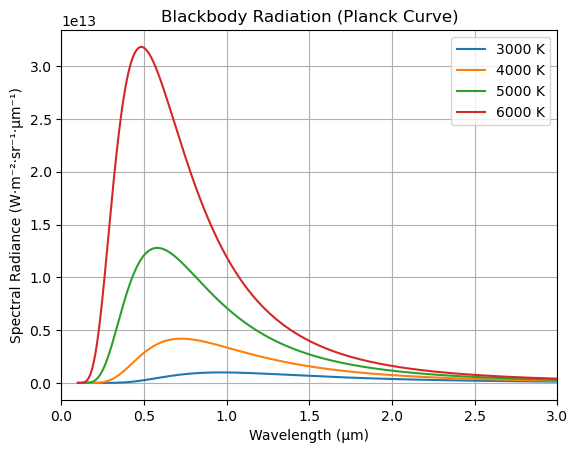

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

h = 6.626e-34
c = 3e8
k = 1.381e-23

def radiance(wavelength, T):
    return (2*h*c**2) / (wavelength**5 * (np.exp(h*c/(wavelength*k*T)) - 1))

wavelengths = np.linspace(0.1e-6, 3e-6, 1000)  # 0.1 µm to 3 µm
for T in [3000, 4000, 5000, 6000]: #more spacing for better visibility of the peak separation
    
    plt.plot(wavelengths*1e6, radiance(wavelengths, T), label=f'{T} K')     
plt.xlabel("Wavelength (µm)")
plt.ylabel("Spectral Radiance (W·m⁻²·sr⁻¹·µm⁻¹)")
plt.title("Blackbody Radiation (Planck Curve)")
plt.legend()
plt.grid(True)
plt.xlim(0, 3)
plt.show()


## Wien's Displacement Law
The wavelength version of Wien's displacement law states that the spectral radiance of black-body radiation per unit wavelength, peaks at the wavelength ${\displaystyle \lambda _{\text{peak}}}$ given by: $${\displaystyle \lambda _{\text{peak}}={\frac {b}{T}}}$$
where :
- b = 2.897771955 $\times 10^{-3} m \cdot K$
- T : absolute temperature (K)

In [19]:
wavelength = np.linspace(0.1e-6, 5e-6, 1000)  # 0.1 µm to 5 µm with more points

def interactive_radiance(T):
    radiance = (2*h*c**2) / (wavelength**5 * (np.exp(h*c/(wavelength*k*T)) - 1))
    
    # Wien's displacement law for reference
    wien_peak = 2.898e-3 / T  # Peak wavelength in meters
    
    plt.figure(figsize=(10, 6)) 
    plt.plot(wavelength*1e6, radiance, 'b-', linewidth=2)
    
    # Mark the Wien peak
    plt.axvline(wien_peak*1e6, color='red', linestyle='--', alpha=0.7, 
                label=f'Wien peak: {wien_peak*1e6:.2f} µm')
    
    plt.xlabel("Wavelength (µm)")
    plt.ylabel("Spectral Radiance (W·m⁻²·sr⁻¹·µm⁻¹)")
    plt.title(f"Blackbody Radiation (T = {T}K)")
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.xlim(0, 5)
    plt.show()

temperature = widgets.IntSlider(
    value=3000,  
    min=500,  
    max=6000,
    step=100,  
    description='Temperature (K):',
    disabled=False,
    continuous_update=False,
    orientation='horizontal'
)

interactive_plot = widgets.interactive(interactive_radiance, T=temperature)
display(interactive_plot)

interactive(children=(IntSlider(value=3000, continuous_update=False, description='Temperature (K):', max=6000,…